### Diagnóstico diabético

#### **Autor: Rahimi Vilchez, Aiad**

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

#### Objetivos principales
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [44]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [45]:
dataset = pd.read_csv(r'C:\Users\samsung lap\Desktop\Facu\6to año\Ciencia de datos\ClusterAI_TP_dataset_diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [64]:
dataset.shape

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [65]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

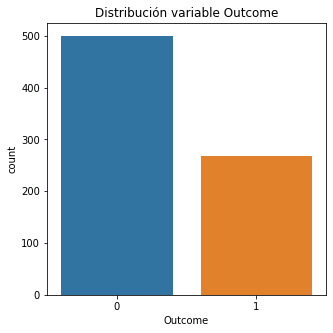

In [66]:
plt.figure (figsize=(5,5))
sns.countplot(x="Outcome", data=dataset)
plt.title("Distribución variable Outcome")
plt.show()

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [67]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

In [ ]:
# Seteo de Tema
sns.set_style('white')
vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age']

# Creo el pairplot
pairplot = sns.pairplot(dataset, hue = 'Outcome', diag_kind = 'hist', palette = 'RdPu', 
                        vars = vars)

# Titulos
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y = 1.03, fontsize = '16', 
                      fontfamily = 'sans-serif')

KeyboardInterrupt: 

In [9]:
# Conclusiones
# Se presentan valores absurdos en la insulina y el DMI (valores igual a 0 cuando no son posibles) al igual que
# la presión de sangre. Todas las variables se relacionan en mayor o menor medida con la probabilidad de tener diabetes.
# Sin embargo destaco dos extremos. La glucosa es la variable que más impacta a la hora de contrastar los datos.
# Por otro lado tenemos el espesor del triceps, en donde el pairplot indica que las mujeres diabeticas son más propensas a
# tener triceps más robustos, no soy un experto de la materia pero en este caso habría que hacer un análisis más 
# profundo, la relación podría ser apresurada.

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

In [10]:
dataset_corr = dataset.corr()
dataset_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


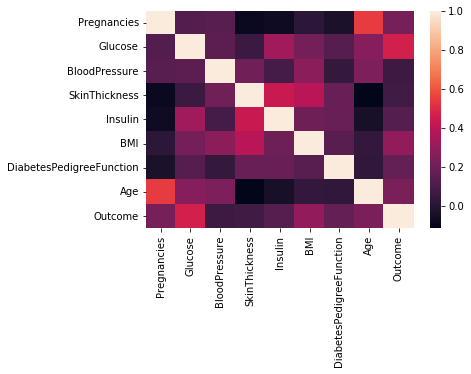

In [11]:
sns.heatmap(dataset_corr)

In [12]:
# El par de variables más correlacionadas son Age y Pregnancies.
# El valor es de 0.544341 y tienen una correlación positiva.
# En sí, la relación de estas variables no tiene una aplicación muy profunda. Es muy intuitiva la idea que a mayor edad,
# mayor es la probabilidad de embarazo. Pero no nos da un contexto a la hora de relacionarlos con el Outcome.

##### **Objetivo 8**
Hacer un histograma de la variable BMI

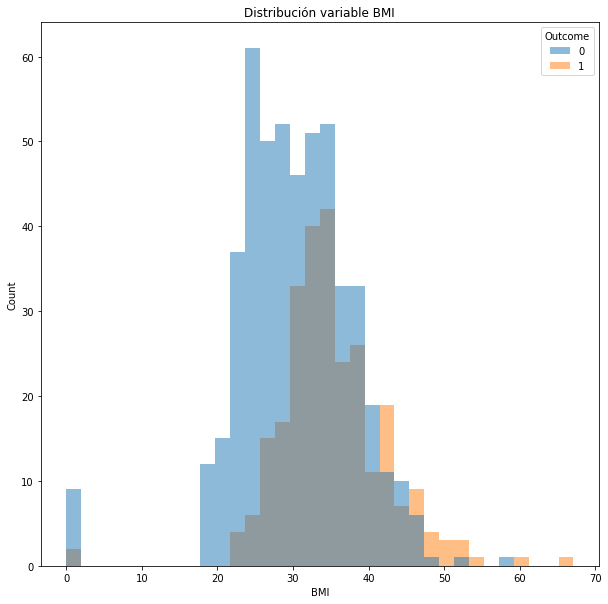

In [13]:
plt.subplots(figsize=(10, 10))
sns.histplot(data=dataset, x='BMI', hue='Outcome', edgecolor=None)
plt.title("Distribución variable BMI")
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

In [14]:
dataset.BMI

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

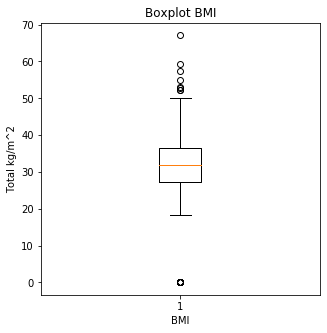

In [15]:
plt.subplots(figsize=(5, 5))
plt.boxplot(dataset.BMI)
plt.title('Boxplot BMI')
plt.ylabel('Total kg/m^2')
plt.xlabel("BMI")
plt.show()

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [68]:
# Se filtra con .loc el Datraframe para la columna BMI
dataset_BMI_filtrado = dataset.loc[dataset['BMI']>0]
dataset_BMI_filtrado.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


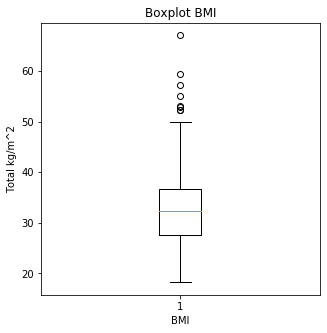

In [17]:
plt.subplots(figsize=(5, 5))
plt.boxplot(dataset_BMI_filtrado.BMI)
plt.title('Boxplot BMI')
plt.ylabel('Total kg/m^2')
plt.xlabel("BMI")
plt.show()

##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

In [ ]:
# Se filtra con .loc el Datraframe para la columna BMI
dataset_outcome_0 = dataset.loc[dataset['Outcome']==0]
dataset_outcome_1 = dataset.loc[dataset['Outcome']==1]
plt.boxplot(dataset_outcome_0.Glucose)
plt.title('Niveles de Glucosa para mujeres no diabéticas')
plt.ylabel('Concentración de glucosa en plasma')
plt.xlabel("Glucosa")
plt.show()
plt.boxplot(dataset_outcome_1.Glucose)
plt.title('Niveles de Glucosa para mujeres diabéticas')
plt.ylabel('Concentración de glucosa en plasma')
plt.xlabel("Glucosa")
plt.show()

In [ ]:
# Se puede observar que la mediana de la concentración de glucosa en personas diabéticas es mayor a diferencia de los no diabéticos.

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

In [ ]:
sns.FacetGrid(dataset, hue="Outcome") \
   .map(plt.scatter, "Glucose", "BloodPressure") \
   .add_legend()

In [ ]:
# Se puede observar que los pacientes diabéticos se encuentan con mayores niveles de glucosa y presión sanguínea.
# No hay correlación lineal, pero visualmente para el Outcome 0 y 1, denotan que tienen una distribución normal con desvío
# estándar similar. En cuanto a la media el par (Glucose,BloodPreassurre) es más elevado para las personas con diabetes (1).

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [47]:
# Por el momento, no concontré la forma de concatenar las DataFrames que había creado.
dataset_prueba2 = dataset
fila_rango_etario = pd.DataFrame(columns=['Rango_etario'], index=range(dataset_prueba2.shape[0])) # Creo la columna Rango_etario con la misma cantidad de filas que el dataset a concatenar shape[0]
dataset_prueba2 = pd.concat([dataset_prueba2,fila_rango_etario], axis=1) #Uno al lado del otro # axis = 0, uno abajo del otro
dataset_prueba2.loc[dataset_prueba2['Age']<30, 'Rango_etario'] = 'Menor a 30' # A las filas en donde Age sea menor a 30, los valores de la columna Rango_etario serán llamados 'Menor a 30'
dataset_prueba2.loc[(dataset_prueba2['Age']>=30) & (dataset_prueba2['Age']<=40), 'Rango_etario'] = 'Entre 30 y 40'
dataset_prueba2.loc[dataset_prueba2['Age']>40, 'Rango_etario'] = 'Mayor a 40'
dataset_prueba2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rango_etario
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Mayor a 40
764,2,122,70,27,0,36.8,0.340,27,0,Menor a 30
765,5,121,72,23,112,26.2,0.245,30,0,Entre 30 y 40
766,1,126,60,0,0,30.1,0.349,47,1,Mayor a 40


In [48]:
dataset_prueba = dataset
dataset_prueba.loc[dataset_prueba['Age']<30] # Mostrar todas las filas de dataset_prueba que tengan Age < 30
dataset_prueba # En esta caso sin embargo, el dataset_prueba no se modifica

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [49]:
dataset # El dataset tampoco

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
dataset_prueba.loc[dataset_prueba['Age']<30] = 'Menor a 30'
# Así cambio TODOS los valores (de todas las comlumnas) de las filas que tienen 'Age' menor a 30
dataset_prueba
# La segunda vez tira error porque cambió los datos en donde 'Age' era menor a 30 por "Menor a 30"
# No puedo comparar valores int donde hay str

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
dataset # PERO CUANDO CAMBIAMOS LOS VALORES DEL dataset_prueba SE MODIFICAN TAMBIÉN LOS DEL DATASET ORIGINAL!!!
# Habíamos declarado que dataset_prueba = dataset, pero no por esto el dataset queda ligado a modificaciones de
# dataset_prueba... o si pasa con los DataFrames?????

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30,Menor a 30
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [52]:
i = 1
j = 2
j = i
j = 4
i # No se modifica el valor de i

1

In [53]:
# Al parecer pasa solo con los DataFrame

In [54]:
dataset_prueba2 # El dataset_prueba2 no se modifica

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Rango_etario
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Mayor a 40
764,2,122,70,27,0,36.8,0.340,27,0,Menor a 30
765,5,121,72,23,112,26.2,0.245,30,0,Entre 30 y 40
766,1,126,60,0,0,30.1,0.349,47,1,Mayor a 40


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

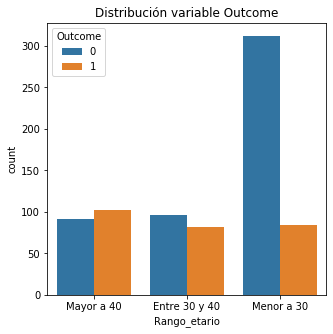

In [57]:
# Por lo tanto no pude realizar este ejercicio.
plt.figure (figsize=(5,5))
sns.countplot(x="Rango_etario", hue='Outcome', data=dataset_prueba2)
plt.title("Distribución variable Outcome")
plt.show()
